In [14]:
import tweepy
import textblob
import numpy as np
import matplotlib.pyplot as plt
import csv

consumer_key = "pzpf4IF4pgNvBfFI37HAlAHiX"
consumer_secret = "hdt5oFuoURbleSORenC6RDq71OUrIBHF8nF5qoX06Kt9UmHLPk"

access_token = "97342605-zwhhoixAhF6q2qcv6UrQgmTQFn4fwKgbKHT1yMRsT"
access_token_secret = "58JkvVrjEOOfGFndRno2KSrYUHjdvnM7voXQZ5QSVQfKd"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)

In [15]:
def sentiment_value(pol):
    if pol > 0.5:
        return "positive"
    elif pol < -0.5:
        return "negative"
    else:
        return "neutral"

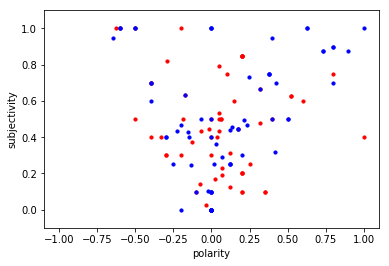

In [22]:
hillary_tweets = api.search("Hillary",count=100,result_type="recent")
trump_tweets = api.search("Trump",count=100,result_type="recent")

data = []

trump_polarity = []
trump_subjectivity = []
for tweet in trump_tweets:
    analysis = textblob.TextBlob(tweet.text).sentiment
    trump_polarity.append(analysis.polarity)
    trump_subjectivity.append(analysis.subjectivity)
    data.append([tweet.text.encode("utf-8"), sentiment_value(analysis.polarity)])
plt.scatter(trump_polarity, trump_subjectivity,c="r",s=10)

hillary_polarity = []
hillary_subjectivity = []
for tweet in hillary_tweets:
    analysis = textblob.TextBlob(tweet.text).sentiment
    hillary_polarity.append(analysis.polarity)
    hillary_subjectivity.append(analysis.subjectivity)
    data.append([tweet.text.encode("utf-8"), sentiment_value(analysis.polarity)])
plt.scatter(hillary_polarity, hillary_subjectivity,c="b",s=10)


plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.xlim([-1.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [23]:
path = "twitter_sentiment.csv"
 
with open(path, "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in data:
            writer.writerow(line)

In [20]:
dir(csv)

['Dialect',
 'DictReader',
 'DictWriter',
 'Error',
 'QUOTE_ALL',
 'QUOTE_MINIMAL',
 'QUOTE_NONE',
 'QUOTE_NONNUMERIC',
 'Sniffer',
 'StringIO',
 '_Dialect',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__version__',
 'excel',
 'excel_tab',
 'field_size_limit',
 'get_dialect',
 'list_dialects',
 're',
 'reader',
 'reduce',
 'register_dialect',
 'unregister_dialect',
 'writer']